In [637]:
import numpy as np
from numpy import linalg as la
def VanillaOption_Explicit(
                  S_0,
                  T,
                  K,
                  r,
                  q,
                  sigma,
                  Time_Steps,
                  Space_Steps,
                  isCall,
                  isAmerican):
    outVector = np.zeros((2,1),dtype = float)
    S_max =  2.0*S_0
    S_min = 0.0
    #Discretization of the Stock and the Time
    dS=(S_max-S_min)/float(Space_Steps)   
    dt=T/float(Time_Steps)
    FV=np.zeros((Time_Steps+1,Space_Steps+1))
    j=np.arange(1,Space_Steps,dtype=np.float)   
    #'Transition Probabilities'
    lower=(-0.5*(r-q)*dt*j+0.5*sigma**2*dt*j**2)/(1.0+r*dt)
    diag=(1.0-sigma**2*dt*j**2)/(1.0+r*dt)
    upper=(0.5*(r-q)*dt*j+0.5*sigma**2*dt*j**2)/(1.0+r*dt)
    #The matrix from the transition probabilities
    A=np.diag(diag)+np.diag(lower[1:Space_Steps-1],k=-1)+np.diag(upper[0:Space_Steps-2],k=1)
    infinityNormOfA = la.norm(A,np.inf)
    outVector[1] = infinityNormOfA
    #The matrix for the option price
    #N+1: Time Steps
    #M+1: Stock Steps   
    #Set up the boundary conditions//Contract dependent :-(
    if(bool(isCall)):
        FV[:,0]=S_min
        FV[:,Space_Steps]=[S_max * np.exp(-r*( Time_Steps - j)*dt)-K for j in range(Time_Steps+1)]
        FV[Time_Steps,:]=np.maximum(np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float)-K,0)
    else:
        FV[:,0]=[K * np.exp(-r*( Time_Steps - j)*dt) for j in range(Time_Steps+1)]
        FV[:,Space_Steps]=0
        FV[Time_Steps,:]=np.maximum(K-np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float),0)
    
    FV=np.matrix(np.array(FV))
    #Start the Backward Iteration
    for i in range(Time_Steps-1,-1,-1):
        k_i=np.zeros((Space_Steps-1,1))
        #Inserts the first and the last element
        k_i[0]=lower[0]*FV[i+1,0] 
        k_i[Space_Steps-2]=upper[Space_Steps-2]*FV[i+1,Space_Steps]
        
        FV[i,1:Space_Steps]=np.dot(FV[i+1,1:Space_Steps],A)+np.matrix(np.array(k_i)).transpose()
        
        if(bool(isAmerican)):
            if(bool(isCall)):
                FV[i,:] = np.maximum(np.arange(S_min,S_max+dS/2,dS,dtype=float)-K,FV[i,:]) 
            else:
                FV[i,:] = np.maximum(K-np.arange(S_min,S_max+dS/2,dS,dtype=float),FV[i,:])
        outVector[0] = FV[0,(FV.shape[1]+1)/2]
    return outVector
def VanillaOption_Explicit_Barrier(
                  S_0,
                  T,
                  K,
                  r,
                  q,
                  sigma,
                  Time_Steps,
                  Space_Steps,
                  isCall,
                  isAmerican,
                  Barrier):
    outVector = np.zeros((2,1),dtype = float)
    S_max =  2.0*S_0
    S_min = 0.0
    #Discretization of the Stock and the Time
    dS=(S_max-S_min)/float(Space_Steps)   
    dt=T/float(Time_Steps)
    FV=np.zeros((Time_Steps+1,Space_Steps+1))
    j=np.arange(1,Space_Steps,dtype=np.float)   
    #'Transition Probabilities'
    lower=(-0.5*(r-q)*dt*j+0.5*sigma**2*dt*j**2)/(1.0+r*dt)
    diag=(1.0-sigma**2*dt*j**2)/(1.0+r*dt)
    upper=(0.5*(r-q)*dt*j+0.5*sigma**2*dt*j**2)/(1.0+r*dt)
    #The matrix from the transition probabilities
    A=np.diag(diag)+np.diag(lower[1:Space_Steps-1],k=-1)+np.diag(upper[0:Space_Steps-2],k=1)
    infinityNormOfA = la.norm(A,np.inf)
    outVector[1] = infinityNormOfA
    #The matrix for the option price
    #N+1: Time Steps
    #M+1: Stock Steps   
    #Set up the boundary conditions//Contract dependent :-(
    if(bool(isCall)):
        FV[:,0]=S_min
        FV[:,Space_Steps]=[S_max * np.exp(-r*( Time_Steps - j)*dt)-K for j in range(Time_Steps+1)]
        FV[Time_Steps,:]=np.maximum(np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float)-K,0)
    else:
        FV[:,0]=[K * np.exp(-r*( Time_Steps - j)*dt) for j in range(Time_Steps+1)]
        FV[:,Space_Steps]=0
        FV[Time_Steps,:]=np.maximum(K-np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float),0)    
    
    FV=np.matrix(np.array(FV))
    #Start the Backward Iteration
    for i in range(Time_Steps-1,-1,-1):
        k_i=np.zeros((Space_Steps-1,1))
        if(bool(isAmerican) == 0):
            FV[FV>(Barrier-K)]=0.0
            
        k_i[0]=lower[0]*FV[i+1,0] 
        k_i[Space_Steps-2]=upper[Space_Steps-2]*FV[i+1,Space_Steps]
        
        FV[i,1:Space_Steps]=np.dot(FV[i+1,1:Space_Steps],A)+np.matrix(np.array(k_i)).transpose()
        
        if(bool(isAmerican)):
            if(bool(isCall)):
                FV[FV<Barrier-K]=0
                FV[i,:] = np.maximum(np.arange(S_min,S_max+dS/2,dS,dtype=float)-K,FV[i,:]) 
            else:
                FV[FV<Barrier-K]=0
                FV[i,:] = np.maximum(K-np.arange(S_min,S_max+dS/2,dS,dtype=float),FV[i,:])
        outVector[0] = FV[0,(FV.shape[1]+1)/2]
    return outVector

In [642]:
S_0 = 50.0
T=1.0
K=50.0
r=0.1
q=0.00
sigma = 0.25
Time_Steps=50
Space_Steps=22
isCall = 1
isAmerican = 0
print VanillaOption_Explicit(
                    S_0,
                    T,
                    K,
                    r,
                    q,
                    sigma,
                    Time_Steps,
                    Space_Steps,
                    isCall,
                    isAmerican)
Barrier = 50
print VanillaOption_Explicit_Barrier(
                    S_0,
                    T,
                    K,
                    r,
                    q,
                    sigma,
                    Time_Steps,
                    Space_Steps,
                    isCall,
                    isAmerican,
                    Barrier)

[[ 7.58665005]
 [ 0.99837824]]
[[ 0.        ]
 [ 0.99837824]]


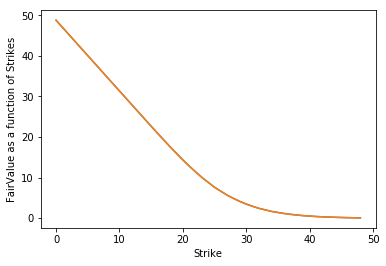

In [592]:
S_0 = 50.0
T=1.0
vec_K=np.arange(0,100,2,float)
r=0.1
q=0.00
sigma = 0.25
Time_Steps=50
Space_Steps=22
isCall = 1
isAmerican = 0
fv_Strikes = np.zeros(vec_K.shape[0]-1)
for i in range(0,vec_K.shape[0]-1):
     fv_Strikes[i] = VanillaOption_Explicit(
                    S_0,
                    T,
                    vec_K[i],
                    r,
                    q,
                    sigma,
                    Time_Steps,
                    Space_Steps,
                    isCall,
                    isAmerican)[0,0]
plt.plot(fv_Strikes)
plt.ylabel("FairValue as a function of Strikes")
plt.xlabel("Strike")
plt.show()

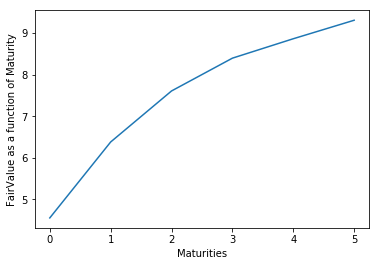

In [634]:
S_0 = 50.0
vec_T=np.arange(0.01,3.5,0.5, float)
K=50
r=0.1
q=0.00
sigma = 0.25
Time_Steps=50
Space_Steps=22
isCall = 1
isAmerican = 0
fv_Maturity = np.zeros(vec_T.shape[0]-1)
for i in range(0,vec_T.shape[0]-1):
     fv_Maturity[i] = VanillaOption_Explicit(
                    S_0,
                    vec_T[i],
                    K,
                    r,
                    q,
                    sigma,
                    Time_Steps,
                    Space_Steps,
                    isCall,
                    isAmerican)[0,0]
plt.plot(fv_Maturity)
plt.ylabel("FairValue as a function of Maturity")
plt.xlabel("Maturities")
plt.show()

In [643]:
import math as math
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / np.sqrt(2.0))) / 2.0
def BlackScholes(S,
                 T,
                 K,
                 r,
                 q,
                 sigma,
                 isCall):
    d1=(np.log(S/K)+T*(r-q+0.5*sigma**2))/(sigma*np.sqrt(T))
    d2=d1-np.sqrt(T)*sigma
    if(bool(isCall)):
            return S*phi(d1)- math.exp(-(r)*T)*K*phi(d2)
    else:
        return math.exp(-r*T)*K*phi(-d2)-S*phi(-d1) 
x=BlackScholes(S_0,T,K,r,q,sigma,isCall)
print x

7.48789538916


7.48789538916


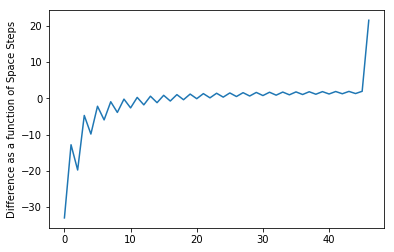

In [576]:
#Numerical Convergence
TimeSteps=np.arange(10,156,5)
SpaceSteps = np.arange(2,50,1)
vecDiffs=np.zeros(SpaceSteps.shape[0]-1)
S_0 = 50.0
T=1.0
K=50.0
r=0.1
q=0.00
sigma = 0.25
Time_Steps=100
Space_Steps=30
isCall = 1
isAmerican = 0
for i in range(0,SpaceSteps.shape[0]-1):
    vecDiffs[i] = x - VanillaOption_Explicit(
                        S_0,
                        T,
                        K,
                        r,
                        q,
                        sigma,
                        Time_Steps,
                        SpaceSteps[i],
                        isCall,
                        isAmerican)[0,0]
plt.plot(vecDiffs)
plt.ylabel("Difference as a function of Space Steps")
plt.show()


In [552]:
print VanillaOption_Implicit(
                    S_0,
                    T,
                    K,
                    r,
                    q,
                    sigma,
                    Time_Steps,
                    Space_Steps,
                    isCall,
                    isAmerican)
print VanillaOption_CrankNicolson(
                    S_0,
                    T,
                    K,
                    r,
                    q,
                    sigma,
                    Time_Steps,
                    Space_Steps,
                    isCall,
                    isAmerican)
def stabilityCondition(Time_Steps,Space_Steps,r,sigma,T):
    dt=T/float(Time_Steps)
    isTrue = bool(0)
    if (dt>0 and dt<1/(sigma**2*(Space_Steps-1)+.5*r)):
        isTrue = bool(1)
    return isTrue

print stabilityCondition(Time_Steps,Space_Steps,r,sigma,T)

def VanillaOption_Implicit(
                  S_0,
                  T,
                  K,
                  r,
                  q,
                  sigma,
                  N,
                  M,
                  isCall,
                  isAmerican):
    outVector = np.zeros((2,1),dtype = float)
    S_max = np.maximum(2.0*K, 2.0*S_0)
    S_min = 0.0
    #Discretization of the Stock and the Time
    dS=(S_max-S_min)/float(M)  
    dt=T/float(N)
    
    j=np.arange(1,M,dtype=np.float)   
    
    #'Transition Probabilities'
    a=(0.5*(r-q)*j*dt-0.5*sigma**2*j**2*dt)
    b=(1.0+sigma**2*j**2*dt+r*dt)
    c=(-0.5*(r-q)*j*dt-0.5*sigma**2*j**2*dt)
    #The matrix from the transition probabilities
    A=np.diag(b)+np.diag(a[1:],k=-1)+np.diag(c[0:M-2],k=1)
    B=la.inv(A)
    infinityNormOfB = la.norm(B,np.inf)
    outVector[1] = infinityNormOfB
    #The matrix for the option price
    #N+1: Time Steps
    #M+1: Stock Steps
    FV=np.zeros((N+1,M+1))
    
    #Set up the boundary conditions//Contract dependent :-(
    if(bool(isCall)):
        FV[:,0]=S_min
        FV[:,M]=[S_max * np.exp(-r*( N - j)*dt)-K for j in range(N+1)]
        FV[N,:]=np.maximum(np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float)-K,0)
    else:
        FV[:,0]=[K * np.exp(-r*( N - j)*dt)-K for j in range(N+1)]
        FV[:,M]=0
        FV[N,:]=np.maximum(K-np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float),0)
    
    FV=np.matrix(np.array(FV))
    #Start the Backward Iteration
    for i in range(N-1,-1,-1):
        k_i=np.zeros((M-1,1))
        #Inserts the first and the last element
        k_i[0]=-a[0]*FV[i+1,0] 
        k_i[M-2]=-c[M-2]*FV[i+1,M]
        
        FV[i,1:M]=np.dot(FV[i+1,1:M]+np.matrix(np.array(k_i)).transpose(),B)
        
        if(bool(isAmerican)):
            if(bool(isCall)):
                FV[i,:] = np.maximum(np.arange(0,S_max+dS/2,dS,dtype=float)-K,FV[i,:]) 
            else:
                FV[i,:] = np.maximum(K-np.arange(0,S_max+dS/2,dS,dtype=float),FV[i,:])
        outVector[0] = FV[0,(FV.shape[1]+1)/2]
    return outVector

def VanillaOption_CrankNicolson(
                  S_0,
                  T,
                  K,
                  r,
                  q,
                  sigma,
                  N,
                  M,
                  isCall,
                  isAmerican):
    outVector = np.zeros((2,1),dtype = float)
    S_max = np.maximum(2.0*K,2.0*S_0)
    S_min = 0.0
    #Discretization of the Stock and the Time
    dS=(S_max-S_min)/float(M)   
    dt=T/float(N)
    
    j=np.arange(1,M,dtype=np.float)   
    
    #'Transition Probabilities'
    a=(dt/4.0)*(-(r-q)*j+sigma**2*j**2)
    b=-(dt/2.0)*(sigma**2*j**2+(r-q))
    c=(dt/4.0)*((r-q)*j+sigma**2*j**2)
    unitVector = [1 for j in range(M-1)]
    #The matrix from the transition probabilities
    C=np.diag(unitVector)-np.diag(b)-np.diag(a[1:],k=-1)-np.diag(c[0:M-2],k=1)
    D=np.diag(unitVector)+np.diag(b)+np.diag(a[1:],k=-1)+np.diag(c[0:M-2],k=1)
    InverseOfC = la.inv(C)
    iteratingMatrix = np.dot(InverseOfC,D)
    infinityNormOfCD = la.norm(iteratingMatrix,np.inf)
    outVector[1] = infinityNormOfCD
    FV=np.zeros((N+1,M+1))
    
    #Set up the boundary conditions//Contract dependent :-(
    if(bool(isCall)):
        FV[:,0]=S_min
        FV[:,M]=[S_max * np.exp(-r*( N - j)*dt)-K for j in range(N+1)]
        FV[N,:]=np.maximum(np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float)-K,0)
    else:
        FV[:,0]=[K * np.exp(-r*( N - j)*dt) for j in range(N+1)]
        FV[:,M]=0
        FV[N,:]=np.maximum(K-np.arange(S_min,S_max+dS/2.0,dS,dtype=np.float),0)
    
    FV=np.matrix(np.array(FV))    
    #Start the Backward Iteration
    for i in range(N-1,-1,-1):
        k_i=np.zeros((M-1,1))
        k_i1=np.zeros((M-1,1))
        #Inserts the first and the last element
        k_i[0]=a[0]*FV[i+1,0] 
        k_i[M-2]=c[M-2]*FV[i+1,M]
        
        k_i1[0]=a[0]*FV[i,0] 
        k_i1[M-2]=c[M-2]*FV[i,M]

        
        FV[i,1:M]= np.dot(FV[i+1,1:M],iteratingMatrix)+ np.dot(np.matrix(np.array(k_i),InverseOfC)).transpose()+ np.dot(np.matrix(np.array(k_i1),InverseOfC)).transpose()
        if(bool(isAmerican)):
            if(bool(isCall)):
                FV[i,:] = np.maximum(np.arange(S_min,S_max+dS/2,dS,dtype=float)-K,FV[i,:]) 
            else:
                FV[i,:] = np.maximum(K-np.arange(S_min,S_max+dS/2,dS,dtype=float),FV[i,:])
        outVector[0] = FV[0,(FV.shape[1]+1)/2]
    return outVector


[[ 7.55936942]
 [ 0.99837703]]


TypeError: data type not understood

7.48789538916


In [263]:
#Dependence on TimeSteps
import matplotlib.pyplot as plt
TimeSteps=np.arange(10,156,5)
SpaceSteps = np.arange(5,106,5)
vecDiffs=np.zeros(TimeSteps.shape[0]-1)
S_0 = 50.0
T=1.0
K=50.0
r=0.1
q=0.00
sigma = 0.25
Time_Steps=100
Space_Steps=30
isCall = 0
isAmerican = 0
for i in range(0,TimeSteps.shape[0]-1):
    vecDiffs[i] = x - VanillaOption_Explicit(
                        S_0,
                        T,
                        K,
                        r,
                        q,
                        sigma,
                        TimeSteps[i],
                        Space_Steps,
                        isCall,
                        isAmerican)[0,0]
  


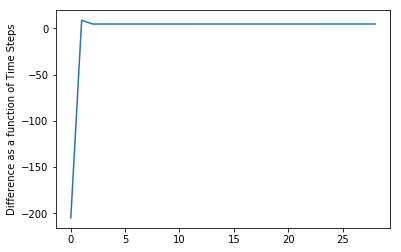

In [264]:
plt.plot(vecDiffs)
plt.ylabel("Difference as a function of Time Steps")
plt.show()


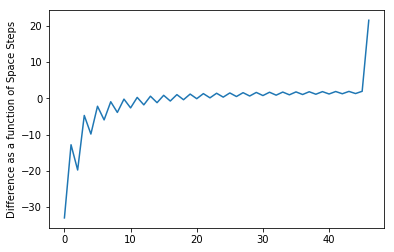

In [507]:
#Dependence on SpaceSteps
TimeSteps=np.arange(10,156,5)
SpaceSteps = np.arange(2,50,1)
vecDiffs=np.zeros(SpaceSteps.shape[0]-1)
S_0 = 50.0
T=1.0
K=50.0
r=0.1
q=0.00
sigma = 0.25
Time_Steps=100
Space_Steps=30
isCall = 1
isAmerican = 0
for i in range(0,SpaceSteps.shape[0]-1):
    vecDiffs[i] = x - VanillaOption_Explicit(
                        S_0,
                        T,
                        K,
                        r,
                        q,
                        sigma,
                        Time_Steps,
                        SpaceSteps[i],
                        isCall,
                        isAmerican)[0,0]
plt.plot(vecDiffs)
plt.ylabel("Difference as a function of Space Steps")
plt.show()


In [266]:
#Dependence on TimeSteps of the Crank-Nicolson
import matplotlib.pyplot as plt
TimeSteps=np.arange(10,156,5)
SpaceSteps = np.arange(5,106,5)
vecDiffs=np.zeros(TimeSteps.shape[0]-1)
S_0 = 50.0
T=1.0
K=50.0
r=0.1
q=0.00
sigma = 0.25
Time_Steps=100
Space_Steps=30
isCall = 1
isAmerican = 0
for i in range(0,TimeSteps.shape[0]-1):
    vecDiffs[i] = x - VanillaOption_CrankNicolson(
                        S_0,
                        T,
                        K,
                        r,
                        q,
                        sigma,
                        TimeSteps[i],
                        Space_Steps,
                        isCall,
                        isAmerican)[0,0]
  


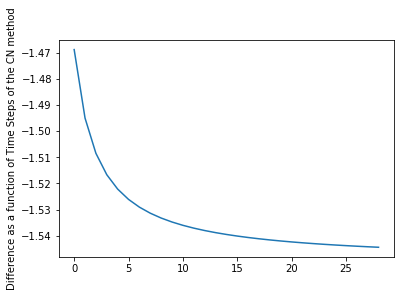

[-1.46869128 -1.49494562 -1.50844153 -1.51664089 -1.52214615 -1.52609657
 -1.5290689  -1.53138618 -1.53324337 -1.53476509 -1.53603466 -1.53710995
 -1.53803238 -1.53883237 -1.53953279 -1.54015112 -1.540701   -1.5411932
 -1.54163634 -1.54203741 -1.54240213 -1.54273521 -1.54304062 -1.54332166
 -1.54358113 -1.54382142 -1.54404459 -1.54425241 -1.54444639]


In [267]:
plt.plot(vecDiffs)
plt.ylabel("Difference as a function of Time Steps of the CN method")
plt.show()
print(vecDiffs)